In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *

In [3]:
PATH='data/grainprices/'

In [5]:
df = pd.read_csv(f'{PATH}monthly_state_grain_prices.csv', na_values=(' (D)', ' (S)'))
df.drop(['Program', 'Week Ending', 'State ANSI', 'Ag District', 'Ag District Code', 'County', 'County ANSI', 'Zip Code', 'Geo Level', 'Region', 'Domain', 'watershed_code', 'Watershed', 'Commodity', 'Data Item', 'Domain Category', 'CV (%)'], axis=1, inplace=True)
df = df.rename(columns={'Period': 'Month'})
df = df[pd.notnull(df['Value'])].infer_objects()

In [6]:
month_to_num = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}
df.Month = df.Month.apply(lambda month: month_to_num[month])
df = df.reset_index(drop=True)

Add lag column

In [6]:
lag_vals = []
for month, year, state in zip(df.Month, df.Year, df.State):
    last_month = None
    targ_year = year
    if (month == 1):
        last_month = 12
        targ_year = year - 1
    else:
        last_month = month - 1
    tmp_df = df[(df.State == state) & (df.Month == last_month) & (df.Year == targ_year)]
    lag_val = None
    if len(tmp_df) == 1:
        lag_val = tmp_df.Value.iloc[0]
    lag_vals.append(lag_val)
df['Lag1'] = lag_vals
df.dropna(subset=['Lag1'], inplace=True)

In [51]:
df = pd.read_feather(f'{PATH}lag1')
lag_vals = []
for month, year, state in zip(df.Month, df.Year, df.State):
    last_month = None
    targ_year = year
    if (month == 1):
        last_month = 12
        targ_year = year - 1
    else:
        last_month = month - 1
    tmp_df = df[(df.State == state) & (df.Month == last_month) & (df.Year == targ_year)]
    lag_val = None
    if len(tmp_df) == 1:
        lag_val = tmp_df.Lag1.iloc[0]
    lag_vals.append(lag_val)
df['Lag2'] = lag_vals
df.dropna(subset=['Lag2'], inplace=True)

In [78]:
df = pd.read_feather(f'{PATH}lag2')
lag_vals = []
for month, year, state in zip(df.Month, df.Year, df.State):
    last_month = None
    targ_year = year
    if (month == 1):
        last_month = 12
        targ_year = year - 1
    else:
        last_month = month - 1
    tmp_df = df[(df.State == state) & (df.Month == last_month) & (df.Year == targ_year)]
    lag_val = None
    if len(tmp_df) == 1:
        lag_val = tmp_df.Lag2.iloc[0]
    lag_vals.append(lag_val)
df['Lag3'] = lag_vals
df.dropna(subset=['Lag3'], inplace=True)

In [81]:
df.reset_index(inplace=True, drop=True)
df.to_feather(f'{PATH}lag3')

,level_0,index,Year,Month,State,Value,Lag1,Lag2,Lag3
0,0,0,2018,1,COLORADO,3.62,3.40,3.18,3.22
1,1,1,2018,1,IDAHO,4.68,4.73,4.66,4.39
2,2,2,2018,1,ILLINOIS,5.08,4.41,4.44,4.21
3,3,4,2018,1,KANSAS,3.94,3.61,3.44,3.48
4,4,5,2018,1,MICHIGAN,4.43,3.82,4.08,4.53
5,5,6,2018,1,MINNESOTA,5.75,5.56,5.52,5.61
6,6,7,2018,1,MISSOURI,4.69,4.39,4.53,4.54
7,7,8,2018,1,MONTANA,5.34,5.30,5.42,5.26
8,8,9,2018,1,NEBRASKA,3.62,3.46,3.48,3.50
9,9,10,2018,1,NORTH CAROLINA,5.11,4.87,4.23,4.58


Preprocessing Checkpoint

In [49]:
df = pd.read_feather(f'{PATH}lag3')

In [50]:
dates = []
for year, month in zip(df.Year.values, df.Month.values):
    dt = datetime.datetime(year, month, 1)
    dates.append(dt)
df['Date'] = dates
df['Date'] = pd.to_datetime(df.Date)
df = df.set_index('Date')

In [51]:
cat_vars = ['Year', 'Month', 'State']
contin_vars = ['Lag1', 'Lag2', 'Lag3']
dep = 'Value'

In [52]:
for v in cat_vars: df[v] = df[v].astype('category').cat.as_ordered()

for v in contin_vars:
    df[v] = df[v].astype('float32')

In [53]:
df_sep, y, nas = proc_df(df, 'Value')
yl = np.log(y)

In [54]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(len(df_sep) * train_ratio); train_size
val_idx = list(range(train_size, len(df_sep)))

In [55]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [56]:
df_sep.drop(axis=1, columns='index', inplace=True)
df_sep.drop(axis=1, columns='level_0', inplace=True)

In [57]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df_sep, y.astype(np.float32), cat_flds=cat_vars, bs=128)

In [58]:
len(df_sep.columns) - len(cat_vars)

3

In [152]:
learn = md.get_learner([(112,50), (13, 7), (43, 22)], len(df_sep.columns) - len(cat_vars), 0.4, 1, [1000, 500], [0.001, 0.01])

In [153]:
learn.fit(1e-3, 3, metrics=[exp_rmspe], cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                    
    0      0.510063   0.007608   0.087205  
    1      0.092302   0.007095   0.08443                       
    2      0.069449   0.007579   0.088003                      
    3      0.067443   0.008931   0.097242                      
    4      0.06571    0.007156   0.08433                       
    5      0.065188   0.007298   0.085614                      
    6      0.064312   0.009251   0.099421                      



[array([ 0.00925]), 0.099421173896187071]

In [154]:
# !export CUDA_LAUNCH_BLOCKING=1
df_state = df_sep[df_sep.State == 5]
cat = df_state[['Year', 'Month', 'State']]
cont = df_state[['Lag1', 'Lag2', 'Lag3']]
# print(df_state)
# print(df_sep)

In [155]:
# learn.predict_array([[2018, 6, 9]], x_cont=[[5.4, 3.4, 5.0]])
learn.model.eval()
pred = to_np(learn.model(to_gpu(V(T(np.array(cat.values)))), to_gpu(V(T(np.array(cont.values))))))

828


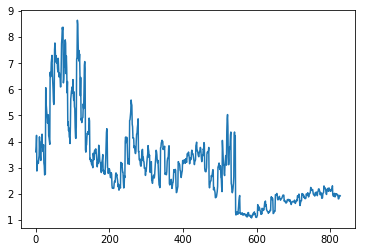

In [156]:
print(len(pred))
matplotlib.pyplot.plot(pred)

828


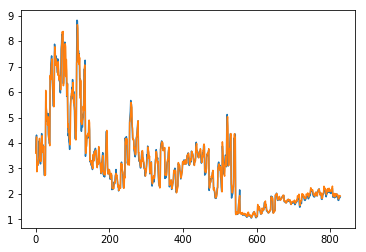

In [157]:
df_actuals = df[df.State == df.State.cat.categories[4]]
actuals = df_actuals[['Value']].values
print(len(actuals))
matplotlib.pyplot.plot(actuals)
matplotlib.pyplot.plot(pred)

In [148]:
gen_out = np.array([0,0,0])
cont1 = cont.values[0]
cat1 = cat.values[0]

for d in range(300):
    tmp_pred = to_np(learn.model(to_gpu(V(T(np.array([cat1])))), to_gpu(V(T(np.array([cont1]))))))
    cont1 = np.append(cont1[1:], tmp_pred)
    gen_out = np.append(gen_out, tmp_pred)

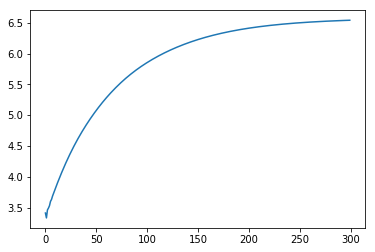

In [158]:
matplotlib.pyplot.plot(gen_out[3:])


In [35]:
cat = df[['Year', 'Month', 'State']]
cont = df[['Lag1', 'Lag2', 'Lag3']]
cont.values

array([[ 3.4 ,  3.18,  3.22],
       [ 4.73,  4.66,  4.39],
       [ 4.41,  4.44,  4.21],
       ..., 
       [ 0.89,  0.89,  0.95],
       [ 0.74,  0.74,  0.74],
       [ 0.91,  0.89,  0.89]], dtype=float32)

In [21]:
DataFrameSummary(df).summary()

,Year,Month,State
count,25031,25031,25031
mean,67.9778,6.49575,21.3035
std,21.4784,3.45081,11.806
min,1,1,1
25%,52,3,11
50%,65,7,21
75%,84,9,31
max,111,12,42
counts,25031,25031,25031
uniques,111,12,42


In [23]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 55%|█████▌    | 79/143 [00:00<00:00, 138.53it/s, loss=0.283] 


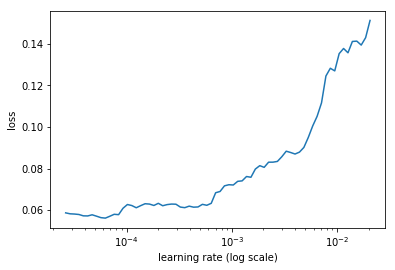

In [24]:
learn.sched.plot()

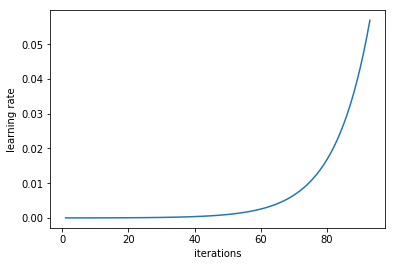

In [17]:
learn.sched.plot_lr()

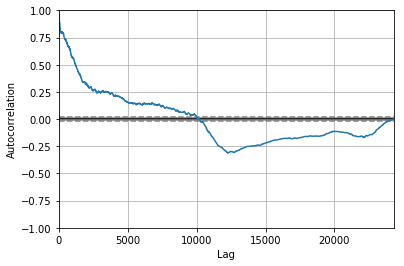

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)

In [49]:
??learn.predict_array